In [124]:
import json

In [125]:
strategy = "binpack"
test = "sine_0_9"

import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd

## Number of utilized nodes

In [126]:
def num_utl_nodes():
    metric = "Num_utilized_nodes"
    contents = []
    with open("../experiment_data/" + test + "/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([0, 4])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(int(entry[1]))
        plt.plot(X, Y)
    
    plt.title("Number of utilized nodes")
    plt.show()

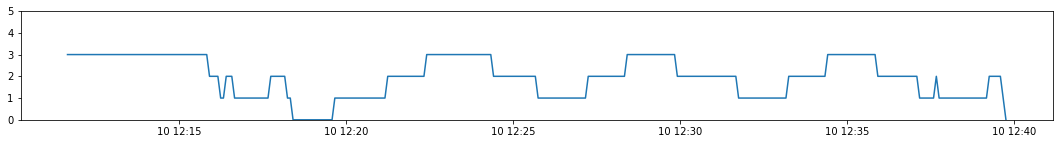

In [127]:
def num_utl_nodes():
    metric = "Num_game_instances_node"
    contents = []
    with open("../experiment_data/" + test + "/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())
            
    # get timeline
    start = float('inf')
    end = 0
    for content in contents:
        n = len(content['values'])
        start = min(start,content['values'][0][0])
        end = max(end,content['values'][-1][0])
    end += 1

        
#     print(start)
#     print(end)
    time = list(range(start,end+5, 5))
    data_tuples = list(zip(time,np.zeros(len(time), dtype=int)))
    df_time = pd.DataFrame(data_tuples, columns=['t', 'values'])
    df_time['t'] = pd.to_datetime(df_time['t'], unit='s', origin='unix')
    df_time = df_time.set_index(['t'])

    df_list = df_time
    
    i = 1 
    for content in contents:  
        df_metrics = pd.DataFrame.from_records(content['values'], columns= ['t', 'values'])
        df_metrics['values'] = df_metrics['values'].astype(int)
        df_metrics['t'] = pd.to_datetime(df_metrics['t'], unit='s', origin='unix')
        df_metrics = df_metrics.set_index(['t'])
        missing_mask = df_time.index.isin(df_metrics.index)
        df = pd.concat([df_metrics,df_time[~missing_mask]]).sort_index()
#         plt.plot(df.index.tolist(),df['values'].tolist())
        
        
#         df_metrics['values'] = df_metrics['values'].astype(int)
#         df_missing = df_time.loc[missing_mask == False]
#         df_metrics = pd.concat([df_metrics, df_time])
#         df_metrics.sort_values(by=['t'])
#         print(df_metrics)
#         print(df_time)
        
        df[df['values'] > 0] = 1
        df_list['node' + str(i)] = df['values']
        i += 1
    
    df_list['values'] = df_list['node1'] + df_list['node2'] + df_list['node3']
#     print(df_list)
    
    plt.plot(df.index.tolist(),df_list['values'].tolist())
    
    ax = plt.gca()
    ax.set_ylim([0, 5])
    fig = plt.gcf()
    fig.set_size_inches(18.5, 2)
    plt.show()


num_utl_nodes()

## Number game instances per node

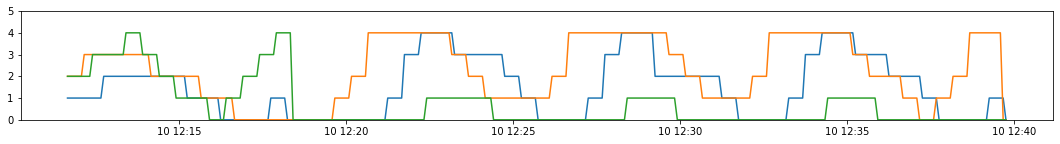

In [128]:
def num_game_instance_node():
    metric = "Num_game_instances_node"
    contents = []
    with open("../experiment_data/" + test + "/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())
            
    # get timeline
    start = float('inf')
    end = 0
    for content in contents:
        n = len(content['values'])
        start = min(start,content['values'][0][0])
        end = max(end,content['values'][-1][0])
    end += 1
        
#     print(start)
#     print(end)
    time = list(range(start,end+5, 5))
    data_tuples = list(zip(time,np.zeros(len(time), dtype=int)))
    df_time = pd.DataFrame(data_tuples, columns=['t', 'values'])
    df_time['t'] = pd.to_datetime(df_time['t'], unit='s', origin='unix')
    df_time = df_time.set_index(['t'])

    for content in contents:  
        df_metrics = pd.DataFrame.from_records(content['values'], columns= ['t', 'values'])
        df_metrics['values'] = df_metrics['values'].astype(int)
        df_metrics['t'] = pd.to_datetime(df_metrics['t'], unit='s', origin='unix')
        df_metrics = df_metrics.set_index(['t'])
        missing_mask = df_time.index.isin(df_metrics.index)
        df = pd.concat([df_metrics,df_time[~missing_mask]]).sort_index()
        plt.plot(df.index.tolist(),df['values'].tolist())
        
        
#         df_metrics['values'] = df_metrics['values'].astype(int)
#         df_missing = df_time.loc[missing_mask == False]
#         df_metrics = pd.concat([df_metrics, df_time])
#         df_metrics.sort_values(by=['t'])
#         print(df_metrics)
#         print(df_time)
        
        
    ax = plt.gca()
    ax.set_ylim([0, 5])
    fig = plt.gcf()
    fig.set_size_inches(18.5, 2)
    plt.show()


num_game_instance_node()

## Number of FPS violating containers per Node

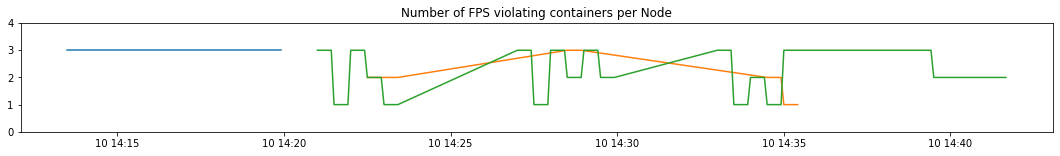

In [130]:
def num_violating_fps():
    metric = "Num_violating_cont_node"
    contents = []
    with open("../experiment_data/" + test + "/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([0, 4])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(int(entry[1]))
        plt.plot(X, Y)
    
    plt.title("Number of FPS violating containers per Node")
    plt.show()
num_violating_fps()

## Average Framerate Per Node

In [131]:
def avg_fps_node():
    metric = "Avg_FPS_node"
    contents = []
    with open("../experiment_data/" + test + "/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
#         print(content['metric']['hostname'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([20, 35])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
    
    plt.title("Average Framerate Per Node")
    plt.show()

## Minimum Framerate Per Node

In [132]:
def min_fps_node():
    metric = "Min_FPS_node"
    contents = []
    with open("../experiment_data/" + test + "/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
#         print(content['metric']['hostname'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([20, 35])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
    
    plt.title("Minimum Framerate Per Node")
    plt.show()

## FPS per container

In [133]:
def fps_cont():
    metric = "FPS_cont"
    contents = []
    with open("../experiment_data/" + test + "/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
    #     print(content['metric']['container_name'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([20, 35])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
        
    plt.title("FPS per container")
    plt.show()

# CPU Utilization Node

In [134]:
def cpu_utl_node():
    metric = "CPU_utl_node"
    contents = []
    with open("../experiment_data/" + test + "/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
#         print(content['metric']['instance'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([0, 1])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
        
    plt.title("CPU utilization Per Node")
    plt.show()

# RAM Utilization Node

In [135]:
def ram_utl_node():
    metric = "RAM_utl_node"
    contents = []
    with open("../experiment_data/" + test + "/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
#         print(content['metric']['instance'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([0, 1])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
        
    plt.title("CPU utilization Per Node")
    plt.show()

# GPU Utilization Node

In [136]:
def gpu_utl_node():
    metric = "GPU_utl_node"
    contents = []
    with open("../experiment_data/" + test + "/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
#         print(content['metric']['instance'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([0, 1])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
        
    plt.title("GPU utilization Per Node")
    plt.show()


# VRAM Utilization Node

In [137]:
def vram_utl_node():
    metric = "VRAM_utl_node"
    contents = []
    with open("../experiment_data/" + test + "/" + strategy + "/" + metric + ".json", 'r') as j:
         contents = json.loads(j.read())

    for content in contents:
#         print(content['metric']['instance'])
        fps_metric = content['values']
        X = []
        Y = []
        ax = plt.gca()
        ax.set_ylim([0, 1])
        fig = plt.gcf()
        fig.set_size_inches(18.5, 2)
        for entry in fps_metric:
            X.append(datetime.datetime.fromtimestamp(entry[0]))
            Y.append(float(entry[1]))
        plt.plot(X, Y)
        
    plt.title("Video memory utilization Per Node")
    plt.show()


Test Data


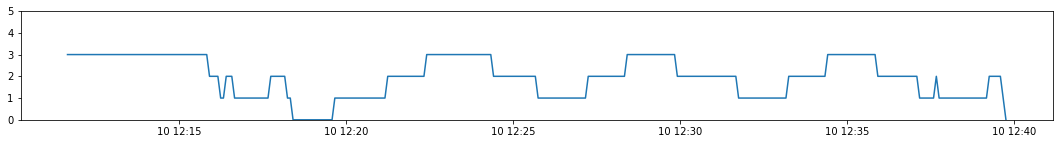

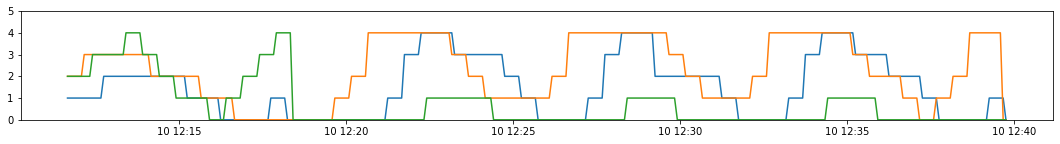

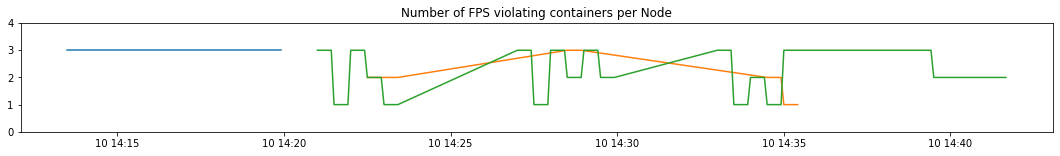

FPS Data


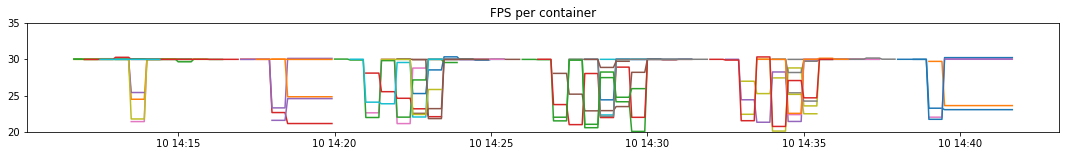

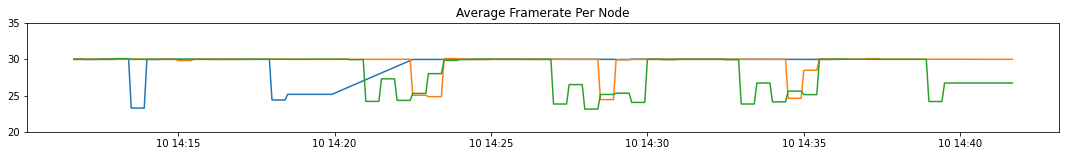

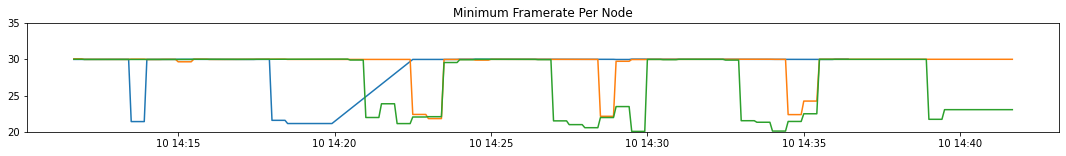

System data


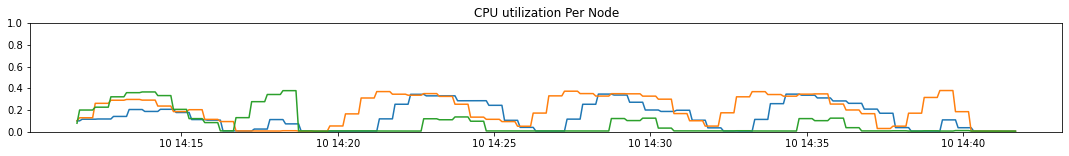

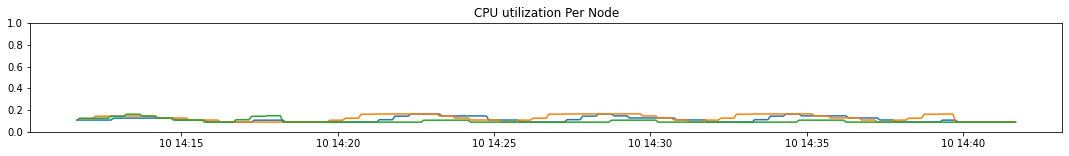

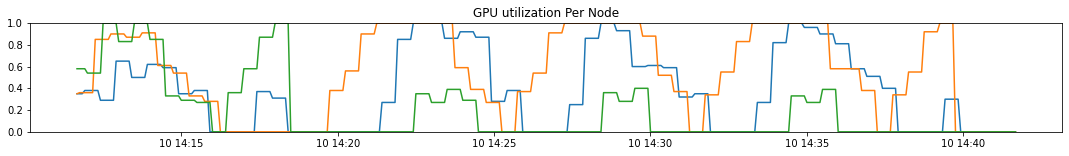

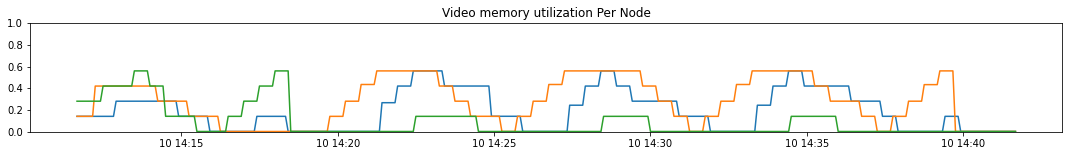

In [138]:
print("Test Data")
#desired game instances
num_utl_nodes()
num_game_instance_node()
num_violating_fps()
print("FPS Data")
fps_cont()
avg_fps_node()
min_fps_node()
print("System data")
cpu_utl_node()
ram_utl_node()
gpu_utl_node()
vram_utl_node()
